# Visualización de UMAP

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
penguins = pd.read_csv("penguins_original.csv")
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [4]:
penguins.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

## Biblioteca UMAP

### Pingüinos

In [5]:
import umap
reducer = umap.UMAP(n_neighbors=15, n_components=2, n_epochs=300, min_dist=0.1, n_jobs=1)

In [6]:
penguin_data = penguins[
    [
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

In [7]:
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

(333, 2)

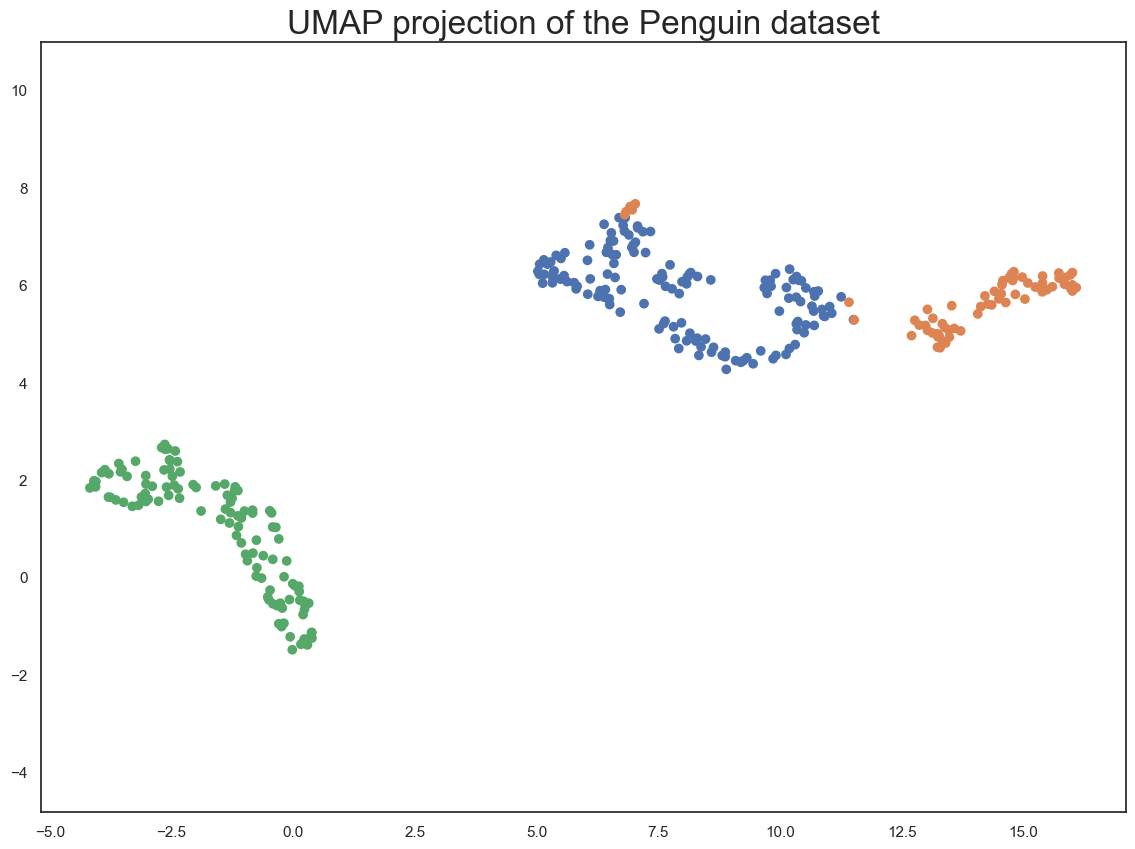

In [8]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);

### Dígitos

In [9]:
digits = load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

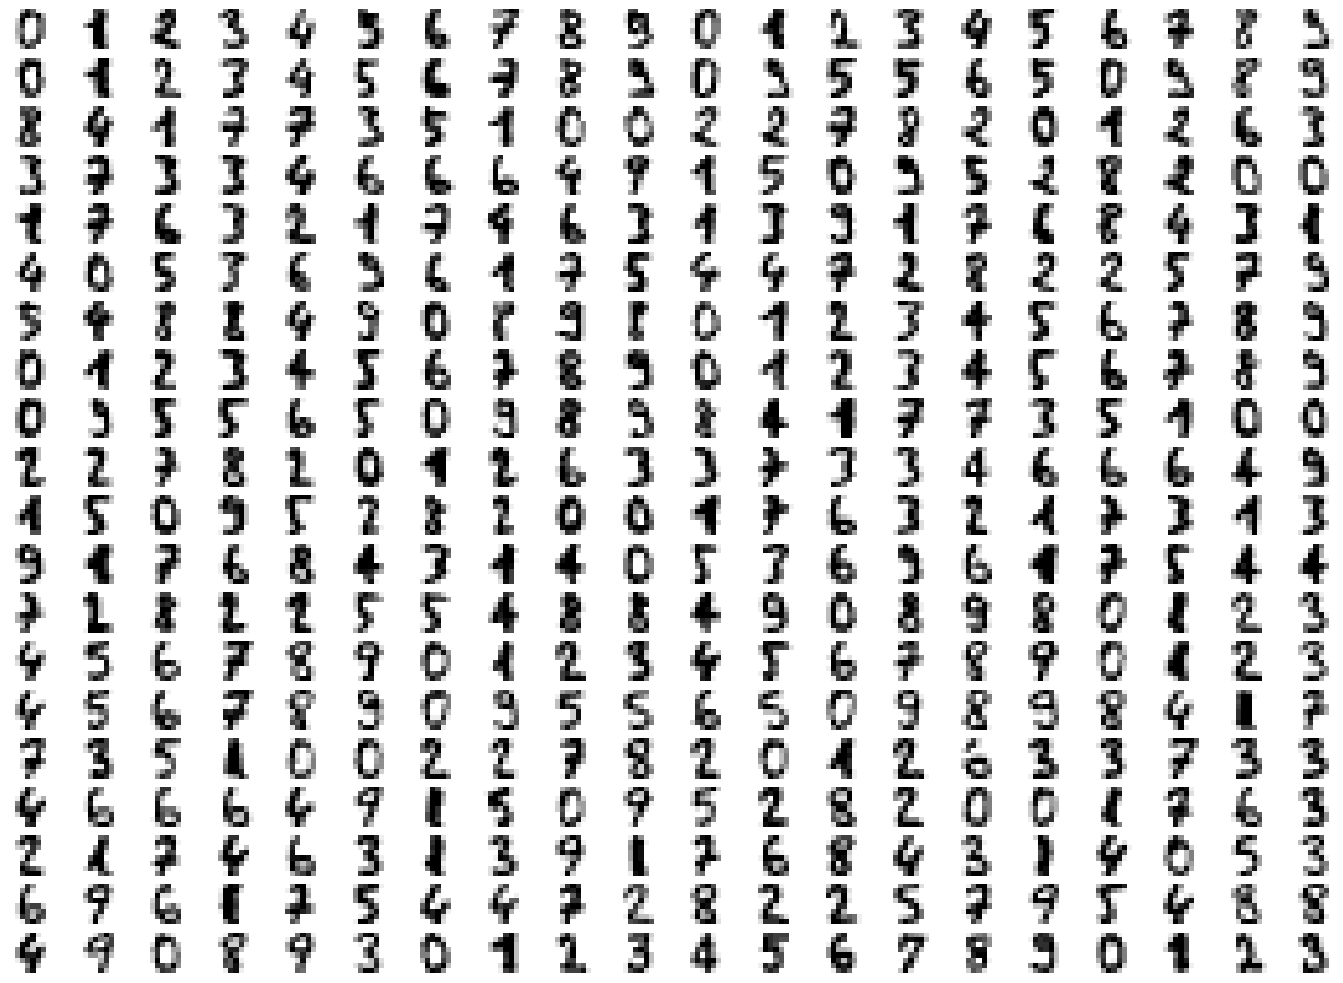

In [10]:
fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [11]:
reducer = umap.UMAP(n_neighbors=15, n_components=2, n_epochs=300, min_dist=0.1, n_jobs=1)

reducer.fit(digits.data)
embedding = reducer.transform(digits.data)

embedding.shape

(1797, 2)

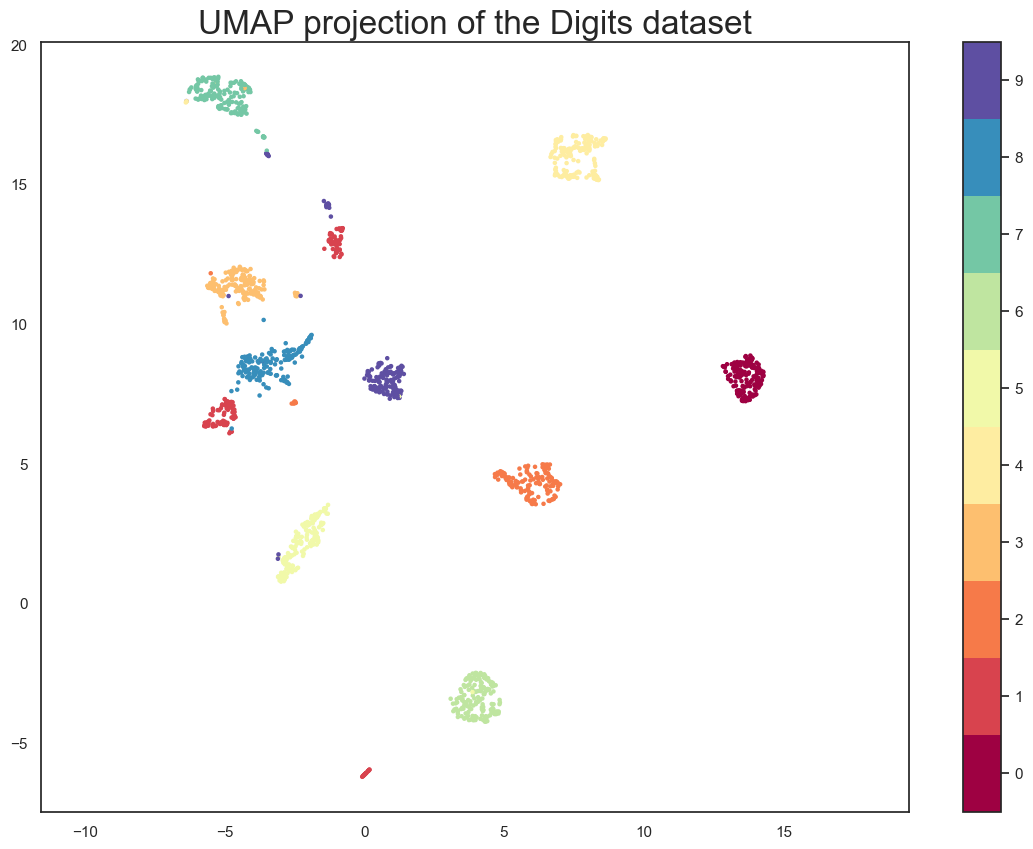

In [12]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

## Implementación de UMAP

### Pingüinos

In [13]:
penguins_output_2d = pd.read_csv("penguins_output.csv", header=None)
penguins_output_2d

,0,1
0,3.924120,-1.422260
1,3.478040,-2.840680
2,3.868220,-3.915240
3,2.216580,0.022514
4,2.579940,2.340290
...,...,...
328,1.579710,16.744800
329,1.114550,10.409200
330,-0.075352,14.266300
331,1.527050,16.421600


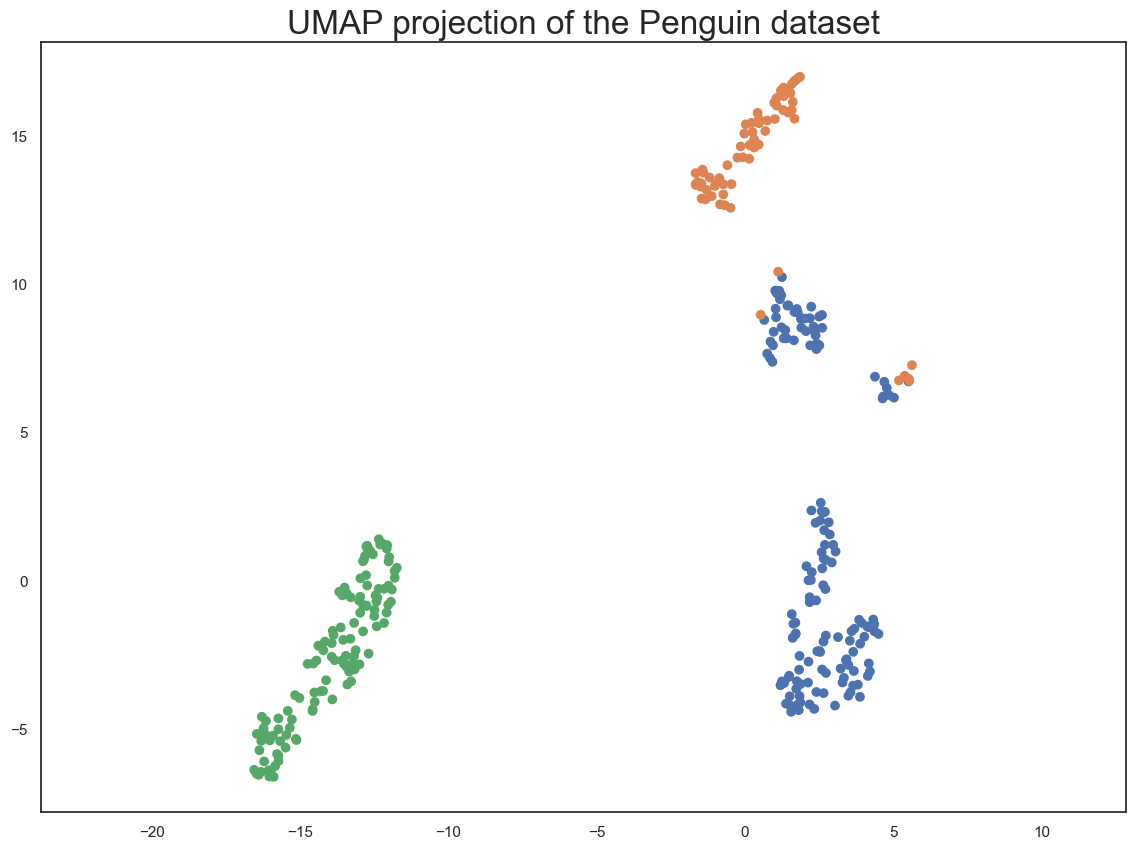

In [14]:
penguins_2d_values = penguins_output_2d.values

plt.scatter(
    penguins_2d_values[:, 0],
    penguins_2d_values[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);

In [15]:
penguins_output_3d = pd.read_csv("penguins_output_3d.csv", header=None)
penguins_output_3d

,0,1,2
0,-3.246020,1.386560,-7.058170
1,-1.825730,0.417823,-7.679500
2,-1.772760,-0.501403,-7.494200
3,-4.540350,1.248400,-6.550360
4,-5.134580,3.292220,-8.198750
...,...,...,...
328,-0.546402,14.241600,0.721715
329,-3.613450,1.163210,-10.397300
330,-1.335470,13.395800,-1.316430
331,-0.808897,13.737500,0.710476


C:\Users\geraw\AppData\Local\Temp\ipykernel_4932\850389682.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(penguins_3d_values[:,0], penguins_3d_values[:,1], penguins_3d_values[:,2],


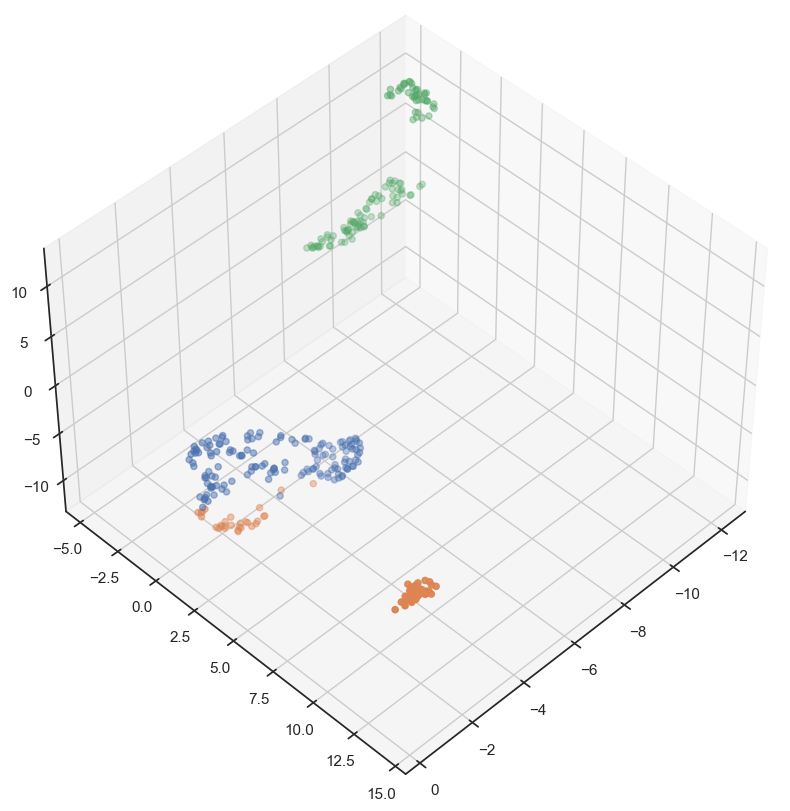

In [16]:
from mpl_toolkits import mplot3d

penguins_3d_values = penguins_output_3d.values

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(penguins_3d_values[:,0], penguins_3d_values[:,1], penguins_3d_values[:,2],
             c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})], cmap='Greens')
ax.view_init(45, 45)

### Dígitos

In [17]:
digits_output_2d = pd.read_csv("digits_output.csv", header=None)

digits_output_2d_values = digits_output_2d.values
digits_output_2d_values.shape

(1797, 2)

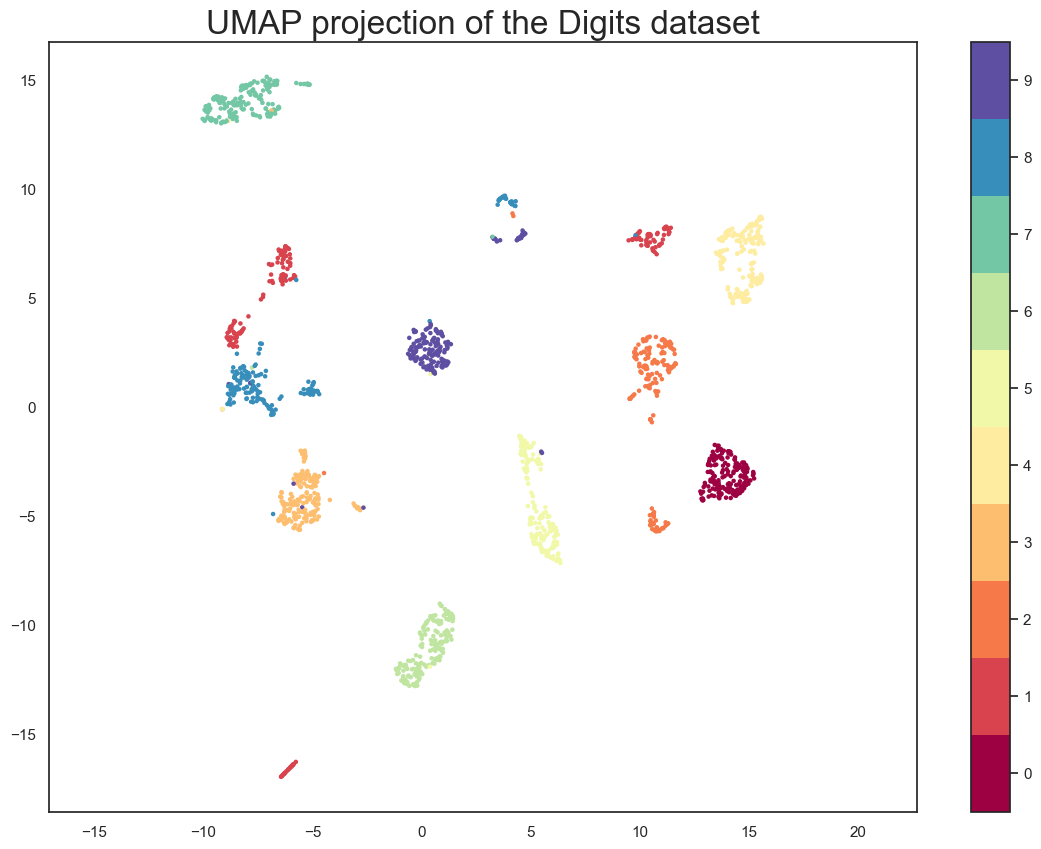

In [18]:
plt.scatter(digits_output_2d_values[:, 0], digits_output_2d_values[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [19]:
digits_output_3d = pd.read_csv("digits_output_3d.csv", header=None)

digits_output_3d_values = digits_output_3d.values
digits_output_3d_values.shape

(1797, 3)

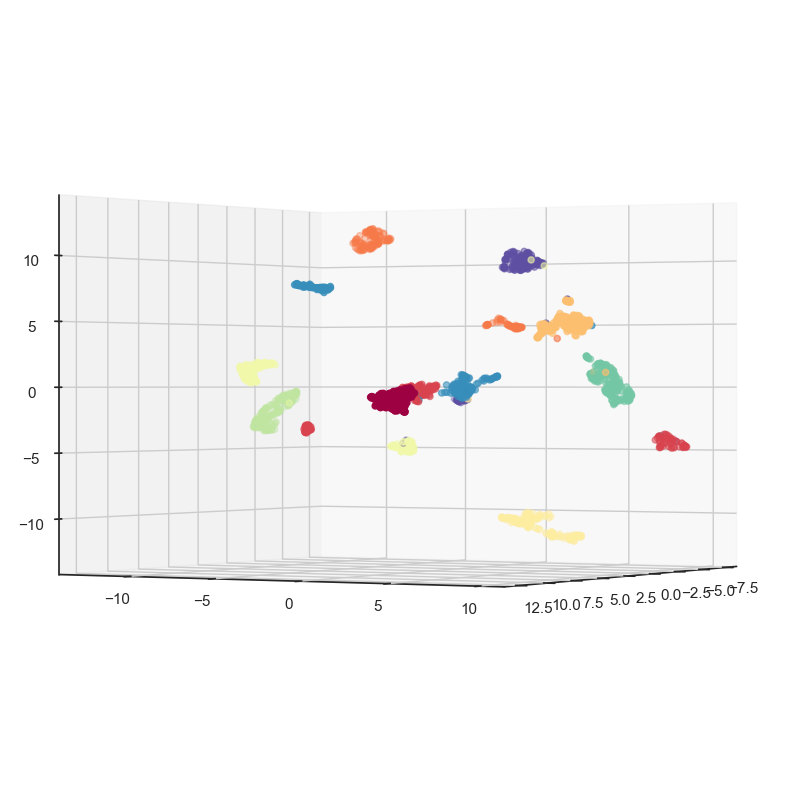

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(digits_output_3d_values[:,0], digits_output_3d_values[:,1], digits_output_3d_values[:,2],
             c=digits.target, cmap='Spectral')
ax.view_init(0, 30)